# Computing Intersections, Unions and IoUs

Computing intersections, unions and especially IoU values (intersection over union) is common for many machine learning experiments. The library offers easy functions for that.

In [8]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ia.seed(1)

In [6]:
# Define image with two bounding boxes.
image = ia.quokka(size=(256, 256))
bb1 = ia.BoundingBox(x1=50, x2=100, y1=25, y2=75)
bb2 = ia.BoundingBox(x1=75, x2=125, y1=50, y2=100)

In [7]:
# Compute intersection, union and IoU value
# Intersection and union are both bounding boxes. They are here
# decreased/increased in size purely for better visualization.
bb_inters = bb1.intersection(bb2).extend(all_sides=-1)
bb_union = bb1.union(bb2).extend(all_sides=2)
iou = bb1.iou(bb2)

print("IOU is :",iou)

IOU is : 0.14285714285714285


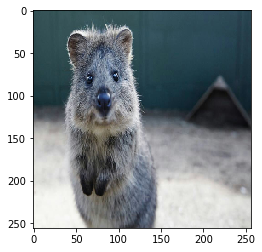

In [13]:
# Draw bounding boxes, intersection, union and IoU value on image.
image_bbs = np.copy(image)
plt.imshow(image_bbs)

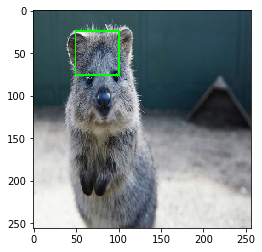

In [14]:
image_bbs = bb1.draw_on_image(image_bbs, thickness=2, color=[0, 255, 0])
plt.imshow(image_bbs)

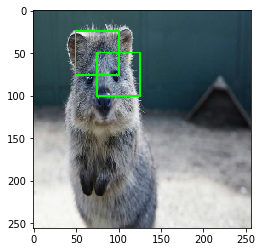

In [15]:
image_bbs = bb2.draw_on_image(image_bbs, thickness=2, color=[0, 255, 0])
plt.imshow(image_bbs)

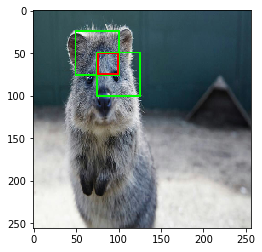

In [16]:
image_bbs = bb_inters.draw_on_image(image_bbs, thickness=2, color=[255, 0, 0])
plt.imshow(image_bbs)

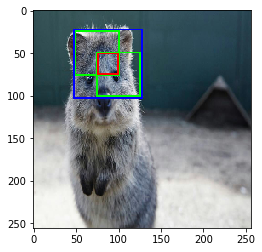

In [17]:
image_bbs = bb_union.draw_on_image(image_bbs, thickness=2, color=[0, 0, 255])
plt.imshow(image_bbs)

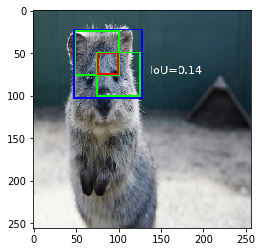

In [18]:
image_bbs = ia.draw_text(
    image_bbs, text="IoU=%.2f" % (iou,),
    x=bb_union.x2+10, y=bb_union.y1+bb_union.height//2,
    color=[255, 255, 255], size=13
)
plt.imshow(image_bbs)
